<a href="https://colab.research.google.com/github/ykitaguchi77/GO_AI_project/blob/main/iFish_YOLOv5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**iFish**

https://github.com/Gil-Mor/iFish

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


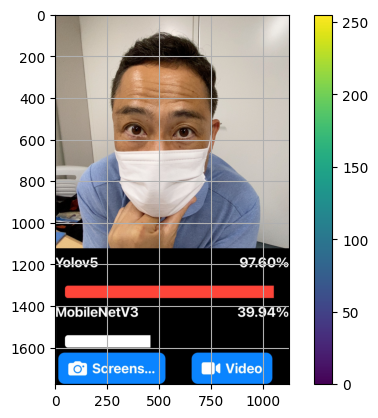

In [84]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Specify the image path
image_path = "/content/drive/MyDrive/Deep_learning/FishEye/sample_img.JPG"

# Read the image
img = mpimg.imread(image_path)

# Create a figure
plt.figure()

# Display the image along with axis
imgplot = plt.imshow(img)

# Show the colorbar
plt.colorbar()

# Show the grid
plt.grid(True)

# Show the image
plt.show()


In [ ]:
# Required Libraries
import imageio
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

# Specify your image path
#image_path = "/content/drive/MyDrive/Deep_learning/GO_extended_dataset/periocular_for_YOLO_training/train/images/1010.JPG"
image_path = "/content/drive/MyDrive/Deep_learning/FishEye/sample_img.JPG"

# Fish Eye Filter Function
def get_fish_xn_yn(source_x, source_y, radius, distortion):
    if 1 - distortion*(radius**2) == 0:
        return source_x, source_y
    return source_x / (1 - (distortion*(radius**2))), source_y / (1 - (distortion*(radius**2)))

def apply_fish_eye_filter(image_path, distortion_coefficient=0.5):
    img = imageio.imread(image_path)
    img = img[200:900, :]  # Crop the image as per the requirement
    w, h = img.shape[0], img.shape[1]
    if len(img.shape) == 2:
        bw_channel = np.copy(img)
        img = np.dstack((img, bw_channel))
        img = np.dstack((img, bw_channel))
    if len(img.shape) == 3 and img.shape[2] == 3:
        img = np.dstack((img, np.full((w, h), 255)))
    dstimg = np.zeros_like(img)
    w, h = float(w), float(h)
    for x in range(len(dstimg)):
        for y in range(len(dstimg[x])):
            xnd, ynd = float((2*x - w)/w), float((2*y - h)/h)
            rd = sqrt(xnd**2 + ynd**2)
            xdu, ydu = get_fish_xn_yn(xnd, ynd, rd, distortion_coefficient)
            xu, yu = int(((xdu + 1)*w)/2), int(((ydu + 1)*h)/2)
            if 0 <= xu and xu < img.shape[0] and 0 <= yu and yu < img.shape[1]:
                dstimg[x][y] = img[xu][yu]
    return dstimg.astype(np.uint8)

# Define Distortion Coefficients Range
distortion_coefficients = np.arange(-0.5, 0.6, 0.1)

# Create Subplots
fig, axs = plt.subplots(len(distortion_coefficients), figsize=(6, 6 * len(distortion_coefficients)))

# Apply Fish Eye Filter for each Distortion Coefficient
for ax, distortion_coefficient in zip(axs, distortion_coefficients):
    output_img = apply_fish_eye_filter(image_path, distortion_coefficient)
    ax.imshow(output_img)
    ax.set_title(f'Fish-eye Filter with Distortion Coefficient = {distortion_coefficient}')
    ax.axis('off')

plt.tight_layout()
plt.show()
